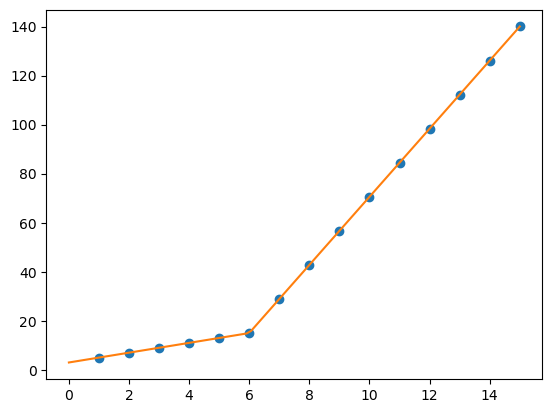

In [4]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 84.47, 98.36, 112.25, 126.14, 140.03])

def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

p , e = optimize.curve_fit(piecewise_linear, x, y)
xd = np.linspace(0, 15, 100)
plt.figure()
plt.plot(x, y, "o")
plt.plot(xd, piecewise_linear(xd, *p))
plt.show()

In [8]:
piecewise_linear(15,*p)

array(140)

In [9]:
p

array([ 5.9981956 , 14.9963912 ,  2.        , 13.89012121])

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Définir la fonction de modèle avec piecewise
def model(delta_T, G1, D1, G2, D2):
    return np.piecewise(delta_T, 
                        [delta_T <= 150, delta_T > 150], 
                        [lambda x: G1 * (1 + (D1 / 100) * (x / 365)), 
                         lambda x: G2 * (1 + (D2 / 100) * (x / 365))])

# Donner les données (toto et delta_T)
toto = np.array([1.04265452, 1.04797228, 1.0727775, 1.06277343, 1.07222195, 
                 np.nan, 1.07610026, 1.08039288, 1.07793261, 1.08784435, 
                 1.06340867, 1.0614738, 1.0677974, 1.07275803, 1.07631217, 
                 1.07639408, 1.06534498, 1.06803932, 1.0698106, 1.07220302, 
                 1.0734672, 1.06462233, 1.07775558, 1.08051735, 1.07818617, 
                 np.nan, 1.0922453, 1.07884682, 1.07881011, 1.0808995, 
                 1.08621861, 1.08562633, 1.09010574, 1.07703987, 1.08461016, 
                 1.06368222, 1.07206531, 1.08109886, 1.07164921, 1.06146712, 
                 1.05241093, 1.06135769, 1.05495886, 1.05659717, 1.05584371, 
                 1.05833934, 1.07118316, 1.08051129, 1.0800819, 1.08185227, 
                 1.07999224, 1.07642863, 1.07947072, 1.0781365, 1.06930166, 
                 1.08683222, 1.09156563, 1.07816841, 1.09230642, 1.09210568, 
                 1.07614047, 1.08428401, 1.09043651, 1.09910943, 1.07612254, 
                 1.08233313, 1.08752193, 1.08263085, 1.09407478, 1.08627888, 
                 1.09547383, 1.09850017, 1.07534657, 1.07000963, 1.06923419, 
                 1.06925489, 1.07009384, 1.06583278, 1.05716913, 1.05675979, 
                 1.07885669, 1.08574363, 1.06941971, 1.07008984, 1.07256245, 
                 1.07188182, 1.0778642, 1.07812297, 1.06927438, 1.09392159, 
                 1.07895672, 1.08525696, 1.09737609, 1.09746748, 1.0953274, 
                 1.08485157, 1.08024222, 1.08880704, 1.09208112, 1.09448081, 
                 1.08336384, 1.09846465, 1.0870643, 1.10052071, 1.09164362, 
                 1.10450575, 1.07843222, 1.09070728, 1.07721488, 1.09141691, 
                 1.08487188, 1.07710079, 1.07649055, 1.0829734, 1.07577504, 
                 1.07259437, 1.07645914, 1.07557938, 1.07748324, 1.07868413, 
                 1.0706093, 1.08030489, 1.09246729, 1.08339156, 1.09598207, 
                 1.0800307, 1.0967532, 1.08387169, 1.09297276, 1.09023536, 
                 1.0988617, 1.09336068, 1.09112595, 1.10106523, 1.09260758, 
                 1.08061488, 1.09968578, 1.10462246, 1.10386028, 1.09757669, 
                 1.08810643, 1.08866708, 1.10512266, 1.09767248, 1.10529093, 
                 1.09811842, 1.08035055, 1.0708552, 1.07756364, 1.07068397, 
                 1.07243043, 1.0742843, 1.08067703, 1.08737028, 1.08884129, 
                 1.07039744, 1.0756953, 1.07974186, 1.08564726, 1.079884, 
                 1.08611468, 1.09272592, 1.08703132, 1.0962788, 1.08642758, 
                 1.09834498, 1.08422595, 1.10255863, 1.08602318, 1.09161009, 
                 1.08580416, 1.10139118, 1.10912887, 1.10692477, 1.10536656, 
                 1.10457726, 1.11302954, 1.09352169, 1.07890689, 1.09354069, 
                 1.09112711, 1.09465144, 1.09145379, 1.08979599, 1.08757987, 
                 1.09728084, 1.08891297, 1.08518955, 1.09576785, 1.09359658, 
                 1.08629822, 1.08257224, 1.09015563, 1.09482578, 1.09717163])

delta_T = np.array([  11.42,  31.29668981,  51.41674769,  71.42152778, 
                     91.41222222,  111.43925926,  131.4172338,  151.40842593, 
                     171.4069213,  191.39893519,  211.40471065,  231.4052662, 
                     251.40890046,  271.40328704,  291.40824074,  311.40733796, 
                     331.40922454,  351.40813657,  371.40511574,  391.40517361, 
                     411.40761574,  431.41083333,  451.40625,  471.40518519, 
                     491.4022338,  511.40541667,  531.40983796,  551.41018519, 
                     561.41116898,  571.41041667,  581.40788194,  591.40540509, 
                     601.41260417,  611.40462963,  621.40935185,  631.40740741, 
                     641.40725694,  651.41081019,  661.41064815,  671.40940972, 
                     681.40305556,  691.4080787,  701.4094213,  711.40334491, 
                     721.40944444,  731.4094213,  741.40511574,  751.40497685, 
                     761.41068287,  771.41123843,  781.40768519,  791.40702546, 
                     801.41273148,  811.40929398,  821.40763889,  831.42201389, 
                     841.41515046,  851.42836806,  861.42273148,  871.42207176, 
                     881.41583333,  891.4184375,  901.41903935,  911.42109954, 
                     921.42017361,  931.41954861,  941.41880787,  951.42, 
                     961.42155093,  971.42688657,  981.41060185,  991.40928241, 
                     1001.42042824, 1011.41883102, 1021.41233796, 1031.40856481, 
                     1041.40627315, 1051.40501157, 1061.41258102, 1071.40940972, 
                     1081.40943287, 1091.4275, 1101.40866898, 1111.40696759, 
                     1121.40894676, 1131.40719907, 1141.40586806, 1151.40679398, 
                     1161.42016204, 1171.41850694, 1181.41993056, 1191.42278935, 
                     1201.4133912, 1211.42430556, 1221.42502315, 1231.42729167, 
                     1241.42313657, 1251.41505787, 1261.42204861, 1271.41621528, 
                     1281.42034722, 1291.42059028, 1301.40454861, 1311.4059375, 
                     1321.40399306, 1331.41755787, 1341.40168981, 1351.4134375, 
                     1361.41108796, 1371.41945602, 1381.40909722, 1391.41101852, 
                     1401.40796296, 1411.41081019, 1421.40662037, 1431.40527778, 
                     1441.41298611, 1451.40695602, 1461.41329861, 1471.4084375, 
                     1481.4047338, 1491.40736111, 1501.40644676, 1511.40555556, 
                     1521.40515046, 1531.40907407, 1541.4065625, 1551.40833333, 
                     1561.40822917, 1571.41230324, 1581.41167824, 1591.4091088, 
                     1601.41103009, 1611.40833333, 1621.40751157, 1631.41238426, 
                     1641.41388889, 1651.4097338, 1661.41108796, 1671.40866898, 
                     1681.41123843, 1691.41146991, 1701.41042824, 1711.40633102, 
                     1721.41034722, 1731.40935185, 1741.41243056, 1751.41049769, 
                     1761.41131944, 1771.40710648, 1781.40828704, 1791.40751157, 
                     1801.40954861, 1811.41008102, 1821.40931713, 1831.40892361, 
                     1841.408125, 1851.40689815, 1861.40907407, 1871.4077662, 
                     1881.40763889, 1891.40568287, 1901.40957176, 1911.40568287, 
                     1921.40614583, 1931.40789352, 1941.4080787, 1951.4109375, 
                     1961.40359954, 1971.41020833, 1981.40540509, 1991.40811343, 
                     2001.4112963, 2011.41172454, 2021.41010417, 2031.40872685, 
                     2041.40847222, 2051.41188657, 2061.4112963, 2071.40771991, 
                     2081.40869213, 2091.40734954, 2101.40929398, 2111.41011574, 
                     2121.40929398, 2131.40924769, 2141.40975694, 2151.41065972, 
                     2170.99143519, 2190.57615741, 2210.15677083, 2229.74565972, 
                     2249.32331019, 2268.90822917, 2288.4959375])

# Fit the model to the data
params, params_covariance = curve_fit(model, delta_T, toto, p0=[1, 1, 1, 1])

G1, D1, G2, D2 = params

# Afficher les résultats
print(f"G1: {G1}, D1: {D1}, G2: {G2}, D2: {D2}")

# Tracer les résultats
plt.plot(delta_T, toto, label="Données réelles")
plt.plot(delta_T, model(delta_T, *params), label="Modèle ajusté", linestyle="--")
plt.legend()
plt.show()


In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from ruptures import Pelt, detection  # Pour détecter des ruptures

# Définir la fonction modèle par morceaux
def model(delta_T, *params):
    segments = len(params) // 2
    result = np.zeros_like(delta_T)
    
    # Appliquer un modèle par morceaux
    for i in range(segments):
        G, D = params[2*i], params[2*i + 1]
        condition = (delta_T >= (i * max(delta_T) / segments)) & (delta_T < ((i + 1) * max(delta_T) / segments))
        result[condition] = G * (1 + (D / 100) * (delta_T[condition] / 365))
    
    return result


algo = rpt.Binseg(model="l2").fit(NCEP_PPOX/dsair['PPOX_DOXY'].values)
bkps = algo.predict(n_bkps)
# Fonction pour détecter les ruptures dans les données
def detect_change_points(delta_T, toto):
    model = Pelt(model="linear").fit(toto)  # Utilisation du modèle linéaire pour la détection
    breakpoints = model.predict(pen=10)  # La pénalité est à ajuster pour détecter plus ou moins de ruptures
    return breakpoints

# Données d'exemple (delta_T et toto)
toto = np.array([1.04265452, 1.04797228, 1.0727775, 1.06277343, 1.07222195, 
                 np.nan, 1.07610026, 1.08039288, 1.07793261, 1.08784435])
delta_T = np.array([  11.42,  31.29668981,  51.41674769,  71.42152778, 
                     91.41222222,  111.43925926,  131.4172338,  151.40842593, 
                     171.4069213,  191.39893519])

# Detecter les ruptures dans les données
breakpoints = detect_change_points(delta_T, toto)
print(f"Ruptures détectées aux indices : {breakpoints}")

# Segmenter les données en fonction des ruptures
segments = [delta_T[start:end] for start, end in zip(breakpoints[:-1], breakpoints[1:])]
segments_values = [toto[start:end] for start, end in zip(breakpoints[:-1], breakpoints[1:])]

# Initialiser une liste pour les paramètres du modèle
initial_params = []

# Ajuster le modèle pour chaque segment
for segment, values in zip(segments, segments_values):
    # Estimer des paramètres initiaux (par exemple, moyennes simples pour G et D)
    G_init = np.mean(values)
    D_init = 0.01  # valeur arbitraire de D initiale
    
    initial_params.extend([G_init, D_init])

# Appliquer curve_fit avec segmentation
params, params_covariance = curve_fit(lambda x, *params: model(x, *params), 
                                      delta_T, toto, p0=initial_params)

# Afficher les résultats
print("Paramètres ajustés : ", params)

# Tracer les résultats
plt.plot(delta_T, toto, label="Données réelles")
plt.plot(delta_T, model(delta_T, *params), label="Modèle ajusté", linestyle="--")
plt.legend()
plt.show()


AssertionError: Not enough dimensions

In [26]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from ruptures import Pelt, detection  # Pour détecter des ruptures
import ruptures as rpt

# Définir la fonction modèle par morceaux
def model(delta_T, *params):
    segments = len(params) // 2
    result = np.zeros_like(delta_T)
    
    # Appliquer un modèle par morceaux
    for i in range(segments):
        G, D = params[2*i], params[2*i + 1]
        condition = (delta_T >= (i * max(delta_T) / segments)) & (delta_T < ((i + 1) * max(delta_T) / segments))
        result[condition] = G * (1 + (D / 100) * (delta_T[condition] / 365))
    
    return result


# Fonction pour détecter les ruptures dans les données
def detect_change_points(delta_T, toto):
    algo = rpt.Binseg(model="l2").fit(toto)
    breakpoints = algo.predict(pen=10)  # La pénalité est à ajuster pour détecter plus ou moins de ruptures
    return breakpoints

# Données d'exemple (delta_T et toto)
toto = np.array([1.04265452, 1.04797228, 1.0727775, 1.06277343, 1.07222195, 
                 np.nan, 1.07610026, 1.08039288, 1.07793261, 1.08784435])
delta_T = np.array([  11.42,  31.29668981,  51.41674769,  71.42152778, 
                     91.41222222,  111.43925926,  131.4172338,  151.40842593, 
                     171.4069213,  191.39893519])

# Detecter les ruptures dans les données
breakpoints = detect_change_points(delta_T, toto)
print(f"Ruptures détectées aux indices : {breakpoints}")

# Segmenter les données en fonction des ruptures
segments = [delta_T[start:end] for start, end in zip(breakpoints[:-1], breakpoints[1:])]
segments_values = [toto[start:end] for start, end in zip(breakpoints[:-1], breakpoints[1:])]

# Initialiser une liste pour les paramètres du modèle
initial_params = []

# Ajuster le modèle pour chaque segment
for segment, values in zip(segments, segments_values):
    # Estimer des paramètres initiaux (par exemple, moyennes simples pour G et D)
    G_init = np.mean(values)
    D_init = 0.01  # valeur arbitraire de D initiale
    
    initial_params.extend([G_init, D_init])

# Appliquer curve_fit avec segmentation
params, params_covariance = curve_fit(lambda x, *params: model(x, *params), 
                                      delta_T, toto, p0=initial_params,nan_policy='omit')

# Afficher les résultats
print("Paramètres ajustés : ", params)

# Tracer les résultats
plt.plot(delta_T, toto, label="Données réelles")
plt.plot(delta_T, model(delta_T, *params), label="Modèle ajusté", linestyle="--")
plt.legend()
plt.show()


Ruptures détectées aux indices : [10]


TypeError: object of type 'numpy.float64' has no len()

In [28]:
delta_T[10-1]

191.39893519

In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from ruptures import Pelt, detection  # Pour détecter des ruptures

# Définir la fonction modèle par morceaux
def model(delta_T, *params):
    segments = len(params) // 2
    result = np.zeros_like(delta_T)
    
    # Appliquer un modèle par morceaux
    for i in range(segments):
        G, D = params[2*i], params[2*i + 1]
        condition = (delta_T >= (i * max(delta_T) / segments)) & (delta_T < ((i + 1) * max(delta_T) / segments))
        result[condition] = G * (1 + (D / 100) * (delta_T[condition] / 365))
    
    return result


# Fonction pour détecter les ruptures dans les données
def detect_change_points(delta_T, toto):
    model = Pelt(model="linear").fit(toto)  # Utilisation du modèle linéaire pour la détection
    breakpoints = model.predict(pen=10)  # La pénalité est à ajuster pour détecter plus ou moins de ruptures
    return breakpoints

# Données d'exemple (delta_T et toto)
toto = np.array([1.04265452, 1.04797228, 1.0727775, 1.06277343, 1.07222195, 
                 np.nan, 1.07610026, 1.08039288, 1.07793261, 1.08784435])
delta_T = np.array([  11.42,  31.29668981,  51.41674769,  71.42152778, 
                     91.41222222,  111.43925926,  131.4172338,  151.40842593, 
                     171.4069213,  191.39893519])

# Detecter les ruptures dans les données
breakpoints = detect_change_points(delta_T, toto)
print(f"Ruptures détectées aux indices : {breakpoints}")

# Segmenter les données en fonction des ruptures
segments = [delta_T[start:end] for start, end in zip(breakpoints[:-1], breakpoints[1:])]
segments_values = [toto[start:end] for start, end in zip(breakpoints[:-1], breakpoints[1:])]

# Initialiser une liste pour les paramètres du modèle
initial_params = []

# Ajuster le modèle pour chaque segment
for segment, values in zip(segments, segments_values):
    # Estimer des paramètres initiaux (par exemple, moyennes simples pour G et D)
    G_init = np.mean(values)
    D_init = 0.01  # valeur arbitraire de D initiale
    
    initial_params.extend([G_init, D_init])

# Appliquer curve_fit avec segmentation
params, params_covariance = curve_fit(lambda x, *params: model(x, *params), 
                                      delta_T, toto, p0=initial_params)

# Afficher les résultats
print("Paramètres ajustés : ", params)

# Tracer les résultats
plt.plot(delta_T, toto, label="Données réelles")
plt.plot(delta_T, model(delta_T, *params), label="Modèle ajusté", linestyle="--")
plt.legend()
plt.show()


AssertionError: Not enough dimensions

In [25]:
model = Pelt(model="linear").fit(toto)  # Utilisation du modèle linéaire pour la détection


AssertionError: Not enough dimensions